1-Business Understanding



Problem statement

Breast cancer is one of the most common spread and Dangerous cancers worldwide . and the process of manual diagnosis and waiting for the Professional to analyze, while its not 100% effective , can be time consuming and subject to human error . thats why there is an essential need to help the medical Equipment by providing accurate and reliable decision support that assist and help classify the tumors detected as benign or malignant. To address this need,machine Learning has been applied to the Wisconsin Diagnostic Breast Cancer (WDBC) dataset for breast cancer classification. specifically , the recent case study by Department of Computer Science Adamson University Manila, Philippines where researchers used GRU-SVM, Linear Regression, Multilayer Perceptron (MLP) and others. by measuring and acheiving an acuracy test we can tell that they achieved excelent results in telling benign and malignant tumors apart . and as we know this technology isnt to work alone . its designed as smart assistant for professionals to make their work faster. the main users are : pathologists , oncologists , gynaecologist

Storytelling bos:

Ilef find that she has a mass in her breast so she decided to check with an oncologist, he asked her to do an fna test ,after the result he presented to her te new ai system 'ena healthy ' analysed her test and find out if it's a benign or malignant tumor,ilef panicked, she was afraid of having a malignant tumor but the doctor calmed her and informed her that it is only an early warning because the system could also tell him the stage of tumor ,and means that they have to extract the mass by a surgery and then they will analyse it. So she booked an appointment with a surgent oncologist. Then a pathologists analyses the mass and 'ena healthy' told them if there is a risk in the future or not. After that she goes to gynaecologist to do frequent check ups to know the risk in the future.

BO(s):

Identify the type of tumor (benign or malignant)

Identify the stage of tumor

Identify the risk in the future

DSO(s):

dso 1 :analyze FNA sample features to instantly diagnose a tumor as Benign or Malignant.

dso 2 :Predict the cancer stage (I, II, III, or IV) by examining the morphology of biopsy cells

dso 3 : estimate the probability of a malignant breast cancer in the future .


| Element              | Content                                                        |
|:---------------------|:---------------------------------------------------------------|
| Involved variables   | 30 features (mean, se, worst) from the WDBC dataset            |
| Parameters           | Distance: L1 & L2  <br>Number of neighbors: 1 (1-NN)           |
| Hyperparameters     | No learning hyperparameters  <br>Epochs = 1 (no training)     |

2-Data Understanding

In [52]:
# ============================================================
# 1) Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set display style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ============================================================
# 2) Load the CSV File
# ============================================================
# Update the path if necessary
df = pd.read_csv("C:/Users/user/Downloads/data (1).csv")

print("Preview of the first 5 rows:")
display(df.head())

# ============================================================
# 3) General Information about the Dataset
# ============================================================
print("\nGeneral information about the dataset:")
df.info()

# ============================================================
# 4) Dataset Dimensions
# ============================================================
print("\nDataset dimensions:", df.shape)

# ============================================================
# 5) Check for Missing Values
# ============================================================
print("\nMissing values per column:")
display(df.isnull().sum())


Preview of the first 5 rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null   

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:


Descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


C:\Users\user\AppData\Local\Temp\ipykernel_3772\3570856036.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=df, palette="viridis")


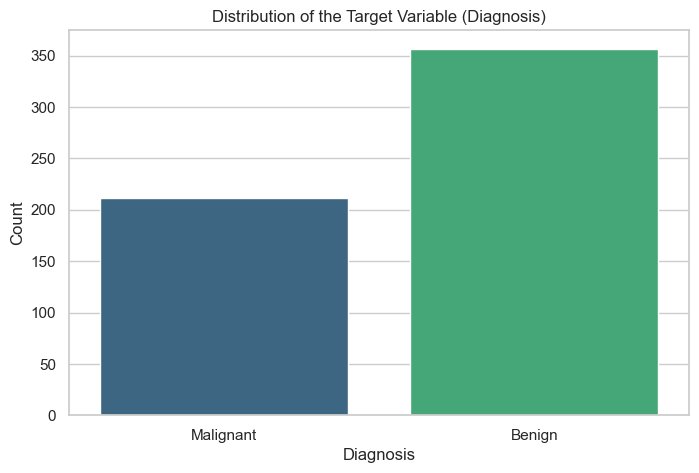


Class distribution:


diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


Class distribution (percentage):


diagnosis
Benign       62.741652
Malignant    37.258348
Name: proportion, dtype: float64

In [54]:
# Optional: Drop unnecessary columns (e.g., 'id' and fully empty columns like 'Unnamed: 32')
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# ============================================================
# 6) Descriptive Statistics
# ============================================================
print("\nDescriptive statistics:")
display(df.describe().T)

# ============================================================
# 7) Distribution of the Target Variable
# ============================================================
# Map diagnosis: M (Malignant) -> 1, B (Benign) -> 0 for easier analysis (optional)
df["diagnosis"] = df["diagnosis"].map({"M": "Malignant", "B": "Benign"})

plt.figure(figsize=(8, 5))
sns.countplot(x="diagnosis", data=df, palette="viridis")
plt.title("Distribution of the Target Variable (Diagnosis)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

print("\nClass distribution:")
display(df["diagnosis"].value_counts())

print("\nClass distribution (percentage):")
display(df["diagnosis"].value_counts(normalize=True) * 100)

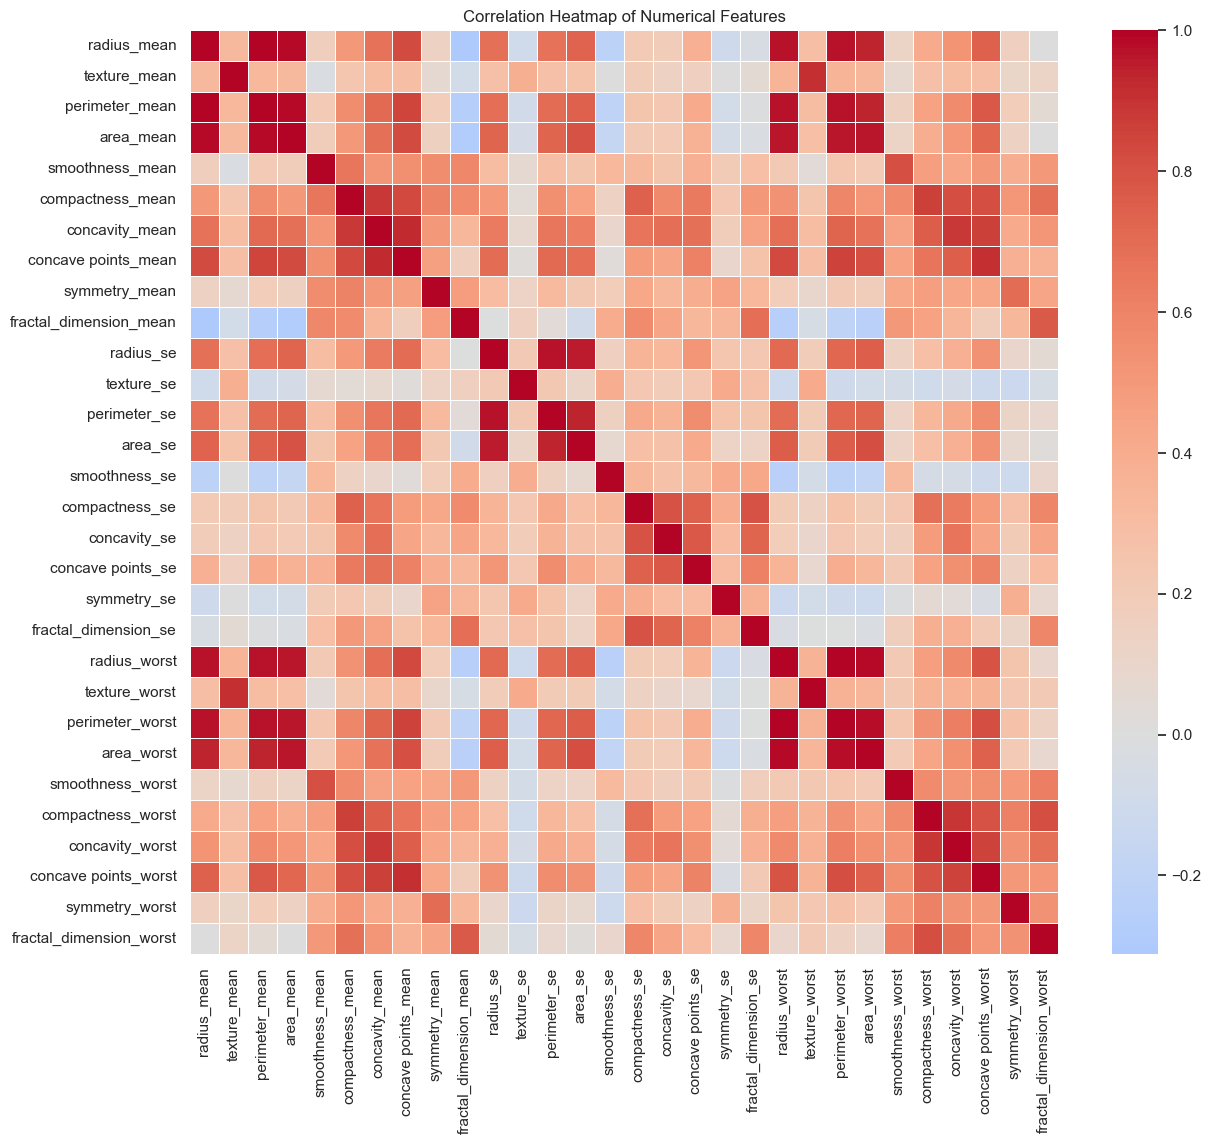


Top 10 pairs of most correlated features:


perimeter_mean   radius_mean        0.997855
radius_mean      perimeter_mean     0.997855
perimeter_worst  radius_worst       0.993708
radius_worst     perimeter_worst    0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
perimeter_mean   area_mean          0.986507
radius_worst     area_worst         0.984015
area_worst       radius_worst       0.984015
dtype: float64

In [56]:
# ============================================================
# 8) Correlation Heatmap (Numerical Features Only)
# ============================================================
# Select only numerical features for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ============================================================
# 9) Top Strongest Correlations
# ============================================================
def top_correlations(corr_matrix, n=10):
    """Return the top n absolute correlations (excluding self-correlations)."""
    corr_unstacked = corr_matrix.abs().unstack()
    corr_unstacked = corr_unstacked[corr_unstacked < 1]  # Exclude correlations of 1 (self)
    return corr_unstacked.sort_values(ascending=False).head(n)

print("\nTop 10 pairs of most correlated features:")
display(top_correlations(corr, n=10))

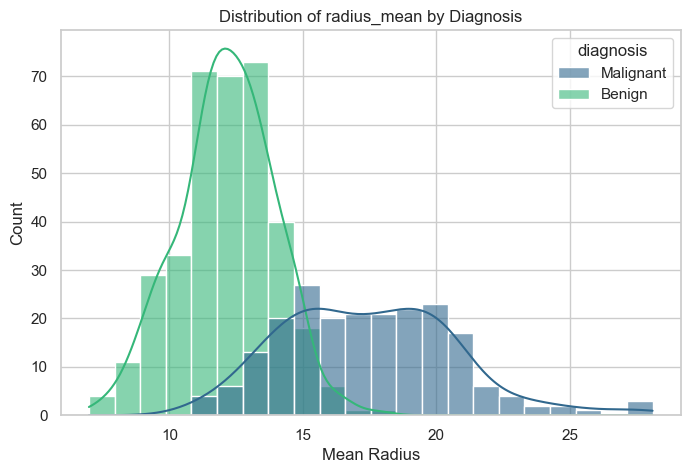

C:\Users\user\AppData\Local\Temp\ipykernel_3772\631926688.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y="radius_mean", data=df, palette="viridis")


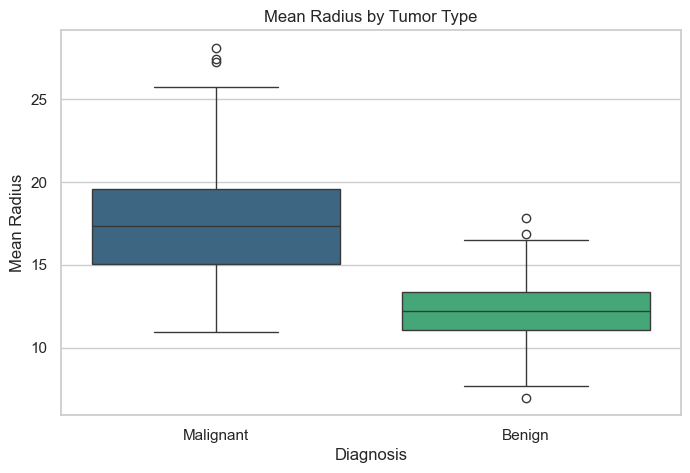

In [58]:
# ============================================================
# 10) Analysis of an Important Feature (e.g., radius_mean)
# ============================================================
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="radius_mean", kde=True, hue="diagnosis", palette="viridis", alpha=0.6)
plt.title("Distribution of radius_mean by Diagnosis")
plt.xlabel("Mean Radius")
plt.show()

# ============================================================
# 11) Boxplot of Feature vs Target
# ============================================================
plt.figure(figsize=(8, 5))
sns.boxplot(x="diagnosis", y="radius_mean", data=df, palette="viridis")
plt.title("Mean Radius by Tumor Type")
plt.xlabel("Diagnosis")
plt.ylabel("Mean Radius")
plt.show()


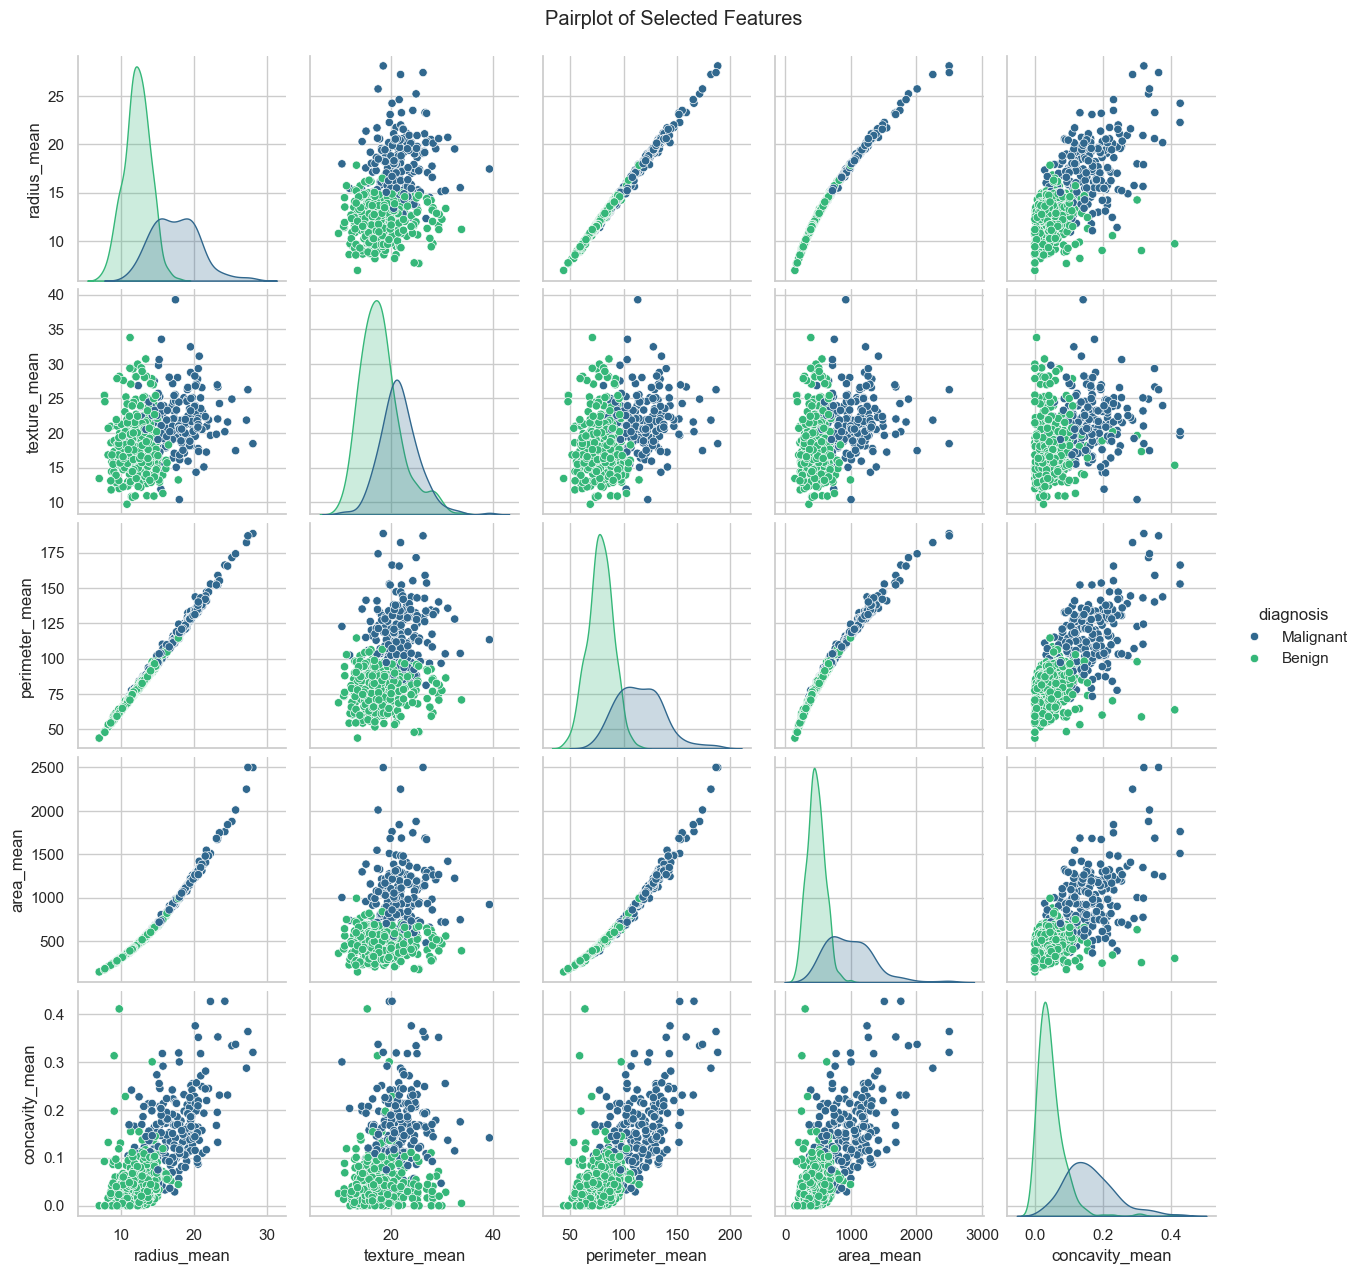

In [60]:
# ============================================================
# 12) Pairplot on Selected Key Features
# ============================================================
key_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "concavity_mean", "diagnosis"]
sns.pairplot(df[key_features], hue="diagnosis", palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


2- Data Preparation 

DSO 1

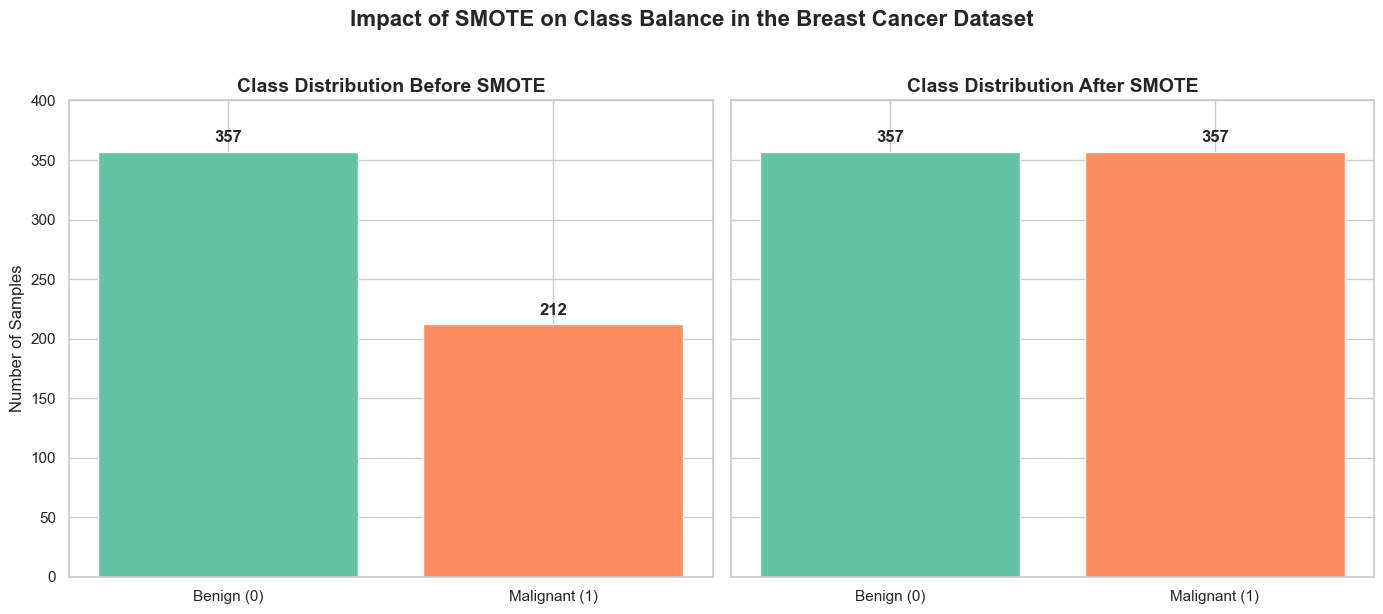

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Create subplots: Before and After SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Before SMOTE
before_counts = [357, 212]
labels = ['Benign (0)', 'Malignant (1)']
colors = ['#66c2a5', '#fc8d62']  # Greenish for Benign, Orange for Malignant

axes[0].bar(labels, before_counts, color=colors)
axes[0].set_title('Class Distribution Before SMOTE', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_ylim(0, 400)
for i, count in enumerate(before_counts):
    axes[0].text(i, count + 8, str(count), ha='center', fontsize=12, fontweight='bold')

# After SMOTE
after_counts = [357, 357]

axes[1].bar(labels, after_counts, color=colors)
axes[1].set_title('Class Distribution After SMOTE', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, 400)
for i, count in enumerate(after_counts):
    axes[1].text(i, count + 8, str(count), ha='center', fontsize=12, fontweight='bold')

# Overall title
plt.suptitle('Impact of SMOTE on Class Balance in the Breast Cancer Dataset', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

The graph shows two bar charts comparing the class distribution before and after applying SMOTE.

Before SMOTE (Left Chart):

The dataset is imbalanced. There are 357 Benign (0) samples and only 212 Malignant (1) samples.

This represents approximately 62.7% Benign and 37.3% Malignant cases.

In real-world scenarios, such imbalance is common in medical datasets (most biopsies are benign), but it can bias machine learning models toward 

predicting the majority class (Benign), leading to poor detection of the minority class (Malignant), which is often the more critical one to identify 

correctly.

After SMOTE (Right Chart):

Both classes now have exactly 357 samples, resulting in a perfectly balanced dataset (50% Benign, 50% Malignant).

The total number of samples has increased from 569 to 714, with SMOTE generating 145 new synthetic Malignant samples based on existing ones

In [100]:
# --- Step 2: Train/Test Split (80/20) with Stratification ---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,          # 20% for test, 80% for training
    random_state=42,        # For reproducibility
    stratify=y_resampled    # Ensures balanced classes in both sets
)

print("\nTrain/Test split completed:")
print(f"Training set: {X_train.shape[0]} samples (80%)")
print(f"Test set:     {X_test.shape[0]} samples (20%)")
print("Balanced classes in training set:", y_train.value_counts().values)
print("Balanced classes in test set:    ", y_test.value_counts().values)


Train/Test split completed:
Training set: 571 samples (80%)
Test set:     143 samples (20%)
Balanced classes in training set: [286 285]
Balanced classes in test set:     [72 71]


In [102]:
# --- Étape 3 : Standardisation (fit sur train seulement !) ---
print("\nStandardisation des features...")

scaler = StandardScaler()

# Fit sur le train seulement
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Jamais de fit sur test !

# Conversion en DataFrame (plus pratique pour la suite)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.")


Standardisation des features...
Standardisation terminée. Moyenne ~0, écart-type ~1 sur train.


In [104]:
# --- Step 3: Feature Scaling (fit on TRAIN only!) ---
print("\nScaling features...")

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Never fit on test data!

# Convert back to DataFrame (more convenient later)
X_train_scaled = pd.DataFrame(
    X_train_scaled, columns=X.columns, index=X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled, columns=X.columns, index=X_test.index
)

print("Scaling completed. Mean ≈ 0, Std ≈ 1 on training data.")


Scaling features...
Scaling completed. Mean ≈ 0, Std ≈ 1 on training data.


DSO 2

In [139]:
# ============================================================
#      MORPHOLOGICAL STAGING FOR MALIGNANT TUMORS ONLY
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1) Keep only malignant tumors (diagnosis = 1)
# ------------------------------------------------------------
df_malignant = df[df["diagnosis"] == 1].copy()
print("Total number of malignant tumors:", len(df_malignant))

# ------------------------------------------------------------
# 2) Selected morphological features
# ------------------------------------------------------------
morpho_features = [
    "radius_worst",
    "concavity_worst",
    "concave points_worst",
    "area_worst",
    "compactness_worst",
    "perimeter_worst"
]

Total number of malignant tumors: 212


In [141]:
# ------------------------------------------------------------
# 3) Normalisation Min-Max
# ------------------------------------------------------------
for f in morpho_features:
    min_val = df_malignant[f].min()
    max_val = df_malignant[f].max()
    df_malignant[f] = (df_malignant[f] - min_val) / (max_val - min_val)

# ------------------------------------------------------------
# 4) Score morphologique
# ------------------------------------------------------------
df_malignant["morpho_score"] = df_malignant[morpho_features].mean(axis=1) * 100

# ------------------------------------------------------------
# 5) Découpage en STAGES (4 niveaux)
# ------------------------------------------------------------
df_malignant["morphology_stage"] = pd.qcut(
    df_malignant["morpho_score"],
    q=4,
    labels=["1", "2", "3", "4"]
)

print("\n=== Distribution stages (MALINS SEULEMENT) ===")
print(df_malignant["morphology_stage"].value_counts().sort_index())





=== Distribution stages (MALINS SEULEMENT) ===
morphology_stage
1    53
2    53
3    53
4    53
Name: count, dtype: int64


In [143]:
# ------------------------------------------------------------
# 6) Moyennes par stage
# ------------------------------------------------------------
print("\n=== morphology_stage mean by Stage ===\n")
grouped_means = df_malignant.groupby("morphology_stage", observed=True)[morpho_features].mean()
print(grouped_means)



=== morphology_stage mean by Stage ===

                  radius_worst  concavity_worst  concave points_worst  \
morphology_stage                                                        
1                     0.200642         0.235633              0.381661   
2                     0.292526         0.337887              0.557766   
3                     0.366973         0.411713              0.647680   
4                     0.569998         0.503835              0.752458   

                  area_worst  compactness_worst  perimeter_worst  
morphology_stage                                                  
1                   0.118447           0.196363         0.178243  
2                   0.185716           0.285341         0.276135  
3                   0.240376           0.383914         0.347862  
4                   0.431661           0.419838         0.552855  



=== Morphological Stage Distribution (Malignant Only) ===
morphology_stage
1    53
2    53
3    53
4    53
Name: count, dtype: int64


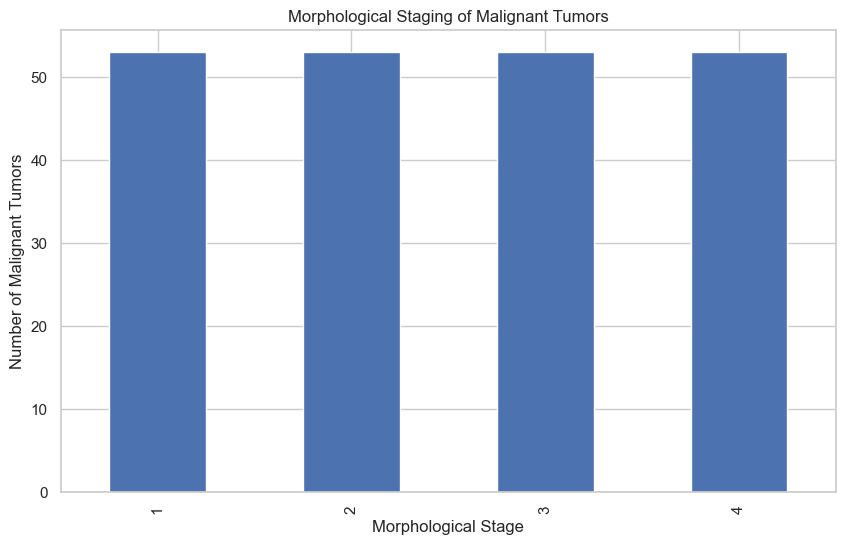

In [134]:
print("\n=== Morphological Stage Distribution (Malignant Only) ===")
stage_counts = df_malignant["morphology_stage"].value_counts().sort_index()
print(stage_counts)

# ------------------------------------------------------------
# 7) Visualization with Matplotlib
# ------------------------------------------------------------
plt.figure()
stage_counts.plot(kind="bar")
plt.xlabel("Morphological Stage")
plt.ylabel("Number of Malignant Tumors")
plt.title("Morphological Staging of Malignant Tumors")
plt.show()


🔹 What the stages represent

Stage 1 → Lowest morphological severity

Stage 2 → Moderate-low severity

Stage 3 → Moderate-high severity

Stage 4 → Highest morphological severity

The staging is based on:

Tumor size (radius, area, perimeter)

Shape irregularity (concavity, concave points)

Structural compactness

All features are normalized, combined into a global morphological score, then split into 4 quantile-based stages.

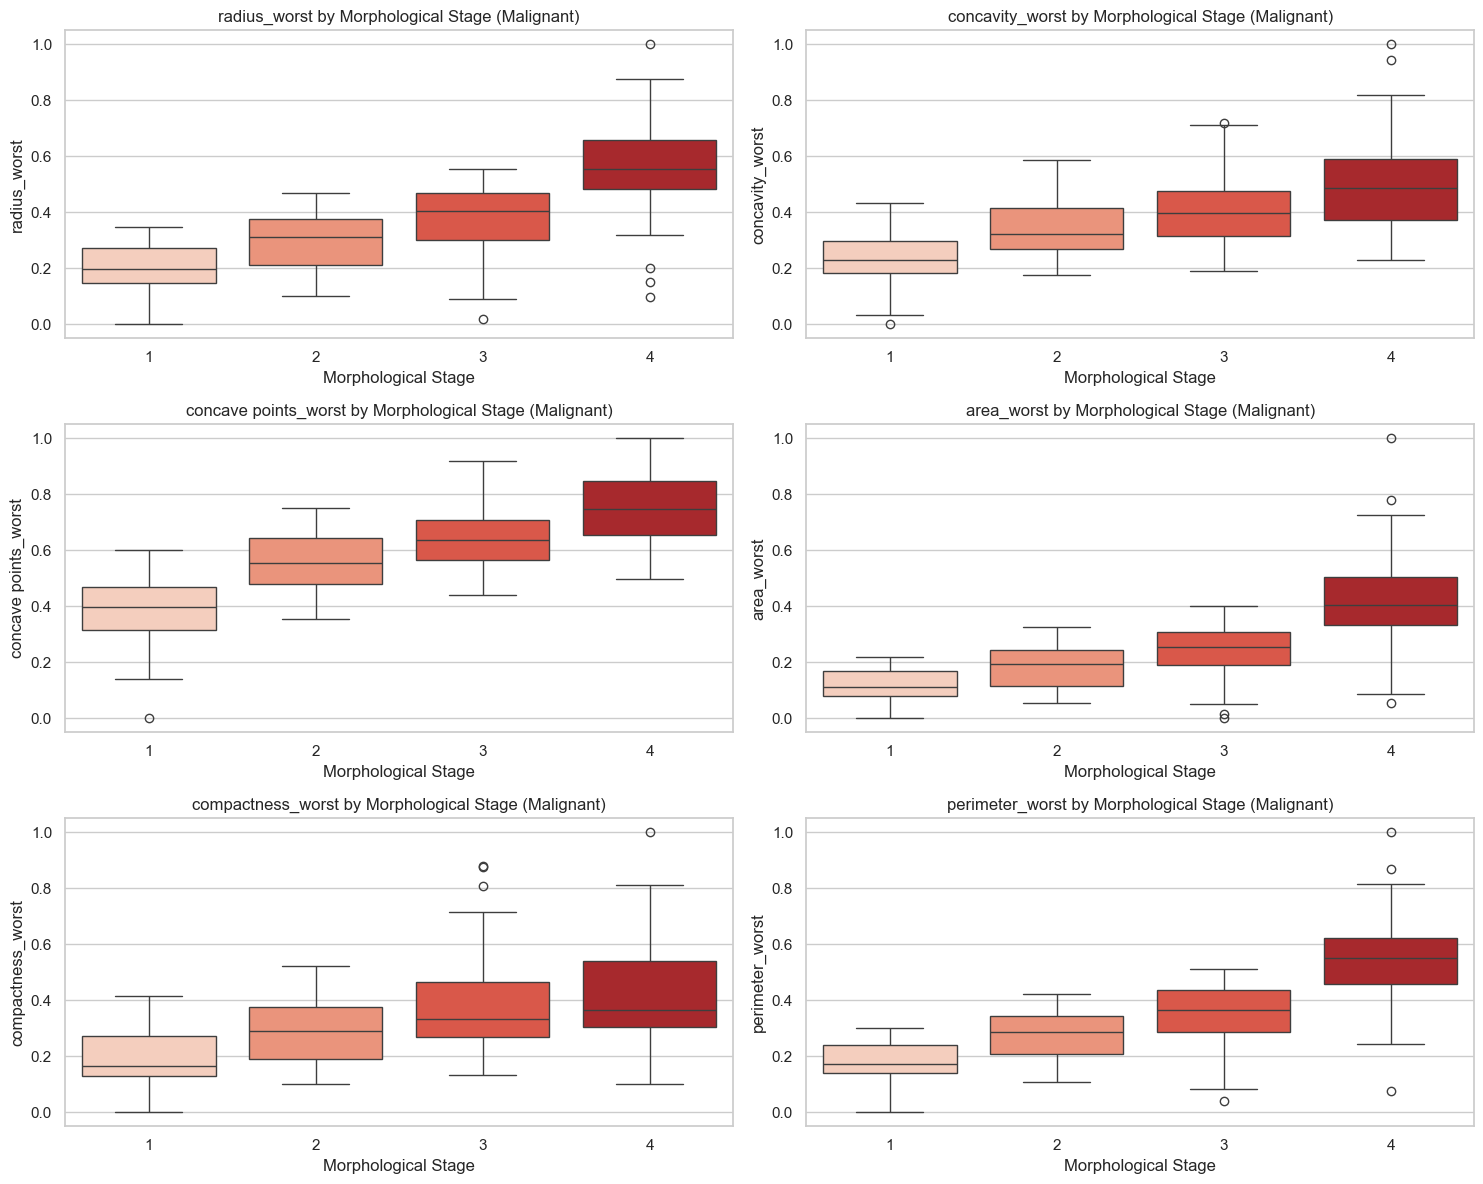

In [137]:
# ------------------------------------------------------------
# 7) Boxplots (Morphological features by stage)
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, feature in enumerate(morpho_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(
        x="morphology_stage",
        y=feature,
        hue="morphology_stage",   # required for palette
        data=df_malignant,
        legend=False,
        palette="Reds"
    )
    plt.title(f"{feature} by Morphological Stage (Malignant)")
    plt.xlabel("Morphological Stage")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


This boxplot shows the average (mean) normalized values of key morphological features for malignant tumors, grouped by morphological stage (1 to 4).

All features were Min–Max normalized (0–1), so higher values indicate greater morphological severity.

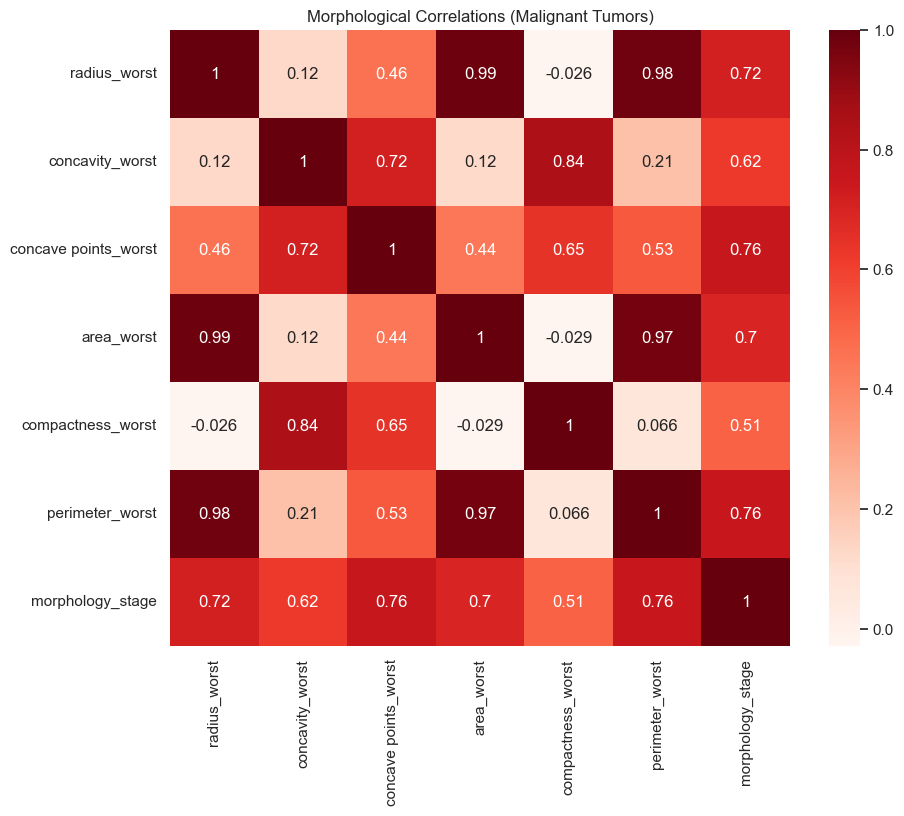


Full analysis completed ✔️


In [148]:
# ------------------------------------------------------------
# 8) Optional: Correlation heatmap by stage
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_stage = df_malignant[morpho_features + ["morphology_stage"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_stage, annot=True, cmap="Reds")
plt.title("Morphological Correlations (Malignant Tumors)")
plt.show()

print("\nFull analysis completed ✔️")


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# =============================
# X / y Preparation for DSO 2
# =============================

# =======================================
# 1) Features and target for DSO 2
# =======================================
X2 = df_malignant[morpho_features]                  # morphological features
y2 = df_malignant["morphology_stage"].astype(int)   # target = stages 1, 2, 3, 4

# =======================================
# 2) Train / test split (80/20)
# =======================================
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2,
    y2,
    test_size=0.20,
    random_state=42,
    stratify=y2
)

# =======================================
# 3) Feature scaling
# =======================================
scaler = StandardScaler()

# Fit only on training data
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)

# =======================================
# 4) Shape verification
# =======================================
print("Shape of X_train2_scaled:", X_train2_scaled.shape)
print("Shape of X_test2_scaled :", X_test2_scaled.shape)
print("Shape of y_train2       :", y_train2.shape)
print("Shape of y_test2        :", y_test2.shape)


Shape of X_train2_scaled: (169, 6)
Shape of X_test2_scaled : (43, 6)
Shape of y_train2       : (169,)
Shape of y_test2        : (43,)


3 - Modeling

DSO1

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Baseline = Logistic Regression simple
baseline_model = LogisticRegression(max_iter=500)
baseline_model.fit(X_train_scaled, y_train)
y_pred_base = baseline_model.predict(X_test_scaled)

In [173]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("\nEntraînement du modèle réduit (1-NN)...")

knn = KNeighborsClassifier(
    n_neighbors=1,
    metric="euclidean",
    weights="uniform"
)

knn.fit(X_train_scaled, y_train)

# Prédictions
y_pred = knn.predict(X_test_scaled)


Entraînement du modèle réduit (1-NN)...


DSO 2

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# =======================================
# 4) Baseline : Logistic Regression
# =======================================
print("\n=== BASELINE MODEL : Logistic Regression ===")

log_reg = LogisticRegression(
    multi_class="multinomial",  # pour multi-classes
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train2_scaled, y_train2)
# Prédiction
y_pred = log_reg.predict(X_test2_scaled)


=== BASELINE MODEL : Logistic Regression ===


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [182]:
from sklearn.ensemble import RandomForestClassifier

print("\n=== RANDOM FOREST MODEL ===")

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

rf.fit(X_train2_scaled, y_train2)
y_pred_rf = rf.predict(X_test2_scaled)





=== RANDOM FOREST MODEL ===


4- Evaluation

DSO 1

In [171]:
print("=== BASELINE : LOGISTIC REGRESSION ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred_base)*100:.2f}%")
print("\nConfusion Matrix :")
print(confusion_matrix(y_test, y_pred_base))
print("\nClassification Report :")
print(classification_report(y_test, y_pred_base))

=== BASELINE : LOGISTIC REGRESSION ===
Accuracy : 97.90%

Confusion Matrix :
[[71  1]
 [ 2 69]]

Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.99      0.97      0.98        71

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [175]:
acc = accuracy_score(y_test, y_pred)
print(f"\n📌 Accuracy Test : {acc*100:.2f}%")

print("\n📌 Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

print("\n📌 Classification Report :")
print(classification_report(y_test, y_pred, digits=4))

print("\nModèle réduit (1-NN) exécuté avec succès ✔️")


📌 Accuracy Test : 95.80%

📌 Confusion Matrix :
[[68  4]
 [ 2 69]]

📌 Classification Report :
              precision    recall  f1-score   support

           0     0.9714    0.9444    0.9577        72
           1     0.9452    0.9718    0.9583        71

    accuracy                         0.9580       143
   macro avg     0.9583    0.9581    0.9580       143
weighted avg     0.9584    0.9580    0.9580       143


Modèle réduit (1-NN) exécuté avec succès ✔️


DSO 2

In [180]:
# Évaluation
acc = accuracy_score(y_test2, y_pred)
print(f"Accuracy = {acc*100:.2f}%")

print("\nConfusion Matrix :")
print(confusion_matrix(y_test2, y_pred))

print("\nClassification Report :")
print(classification_report(y_test2, y_pred))

Accuracy = 97.67%

Confusion Matrix :
[[11  0  0  0]
 [ 0 10  0  0]
 [ 0  1 10  0]
 [ 0  0  0 11]]

Classification Report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        10
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        11

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



In [184]:
acc_rf = accuracy_score(y_test2, y_pred_rf)
print(f"Accuracy RF = {acc_rf*100:.2f}%")

print("\nConfusion Matrix :")
print(confusion_matrix(y_test2, y_pred_rf))

print("\nClassification Report :")
print(classification_report(y_test2, y_pred_rf))

Accuracy RF = 93.02%

Confusion Matrix :
[[10  1  0  0]
 [ 0 10  0  0]
 [ 0  1 10  0]
 [ 0  0  1 10]]

Classification Report :
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.83      1.00      0.91        10
           3       0.91      0.91      0.91        11
           4       1.00      0.91      0.95        11

    accuracy                           0.93        43
   macro avg       0.94      0.93      0.93        43
weighted avg       0.94      0.93      0.93        43



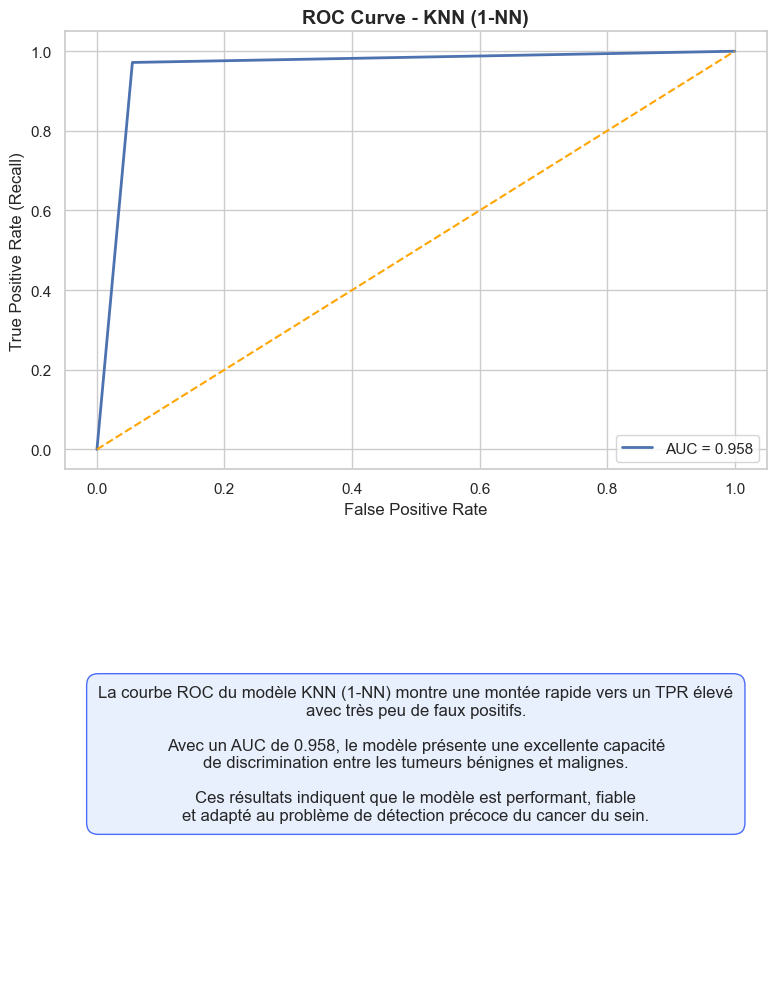

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# ROC CALCULATION
# =======================
y_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = auc(fpr, tpr)

# =======================
# PLOT ROC CURVE + TEXT
# =======================
plt.figure(figsize=(8, 10))

# --- ROC Curve ---
plt.subplot(2, 1, 1)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}", linewidth=2)
plt.plot([0, 1], [0, 1], "--", color="orange")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curve - KNN (1-NN)", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True)

# --- Interprétation stylée ---
plt.subplot(2, 1, 2)
plt.axis("off")  # enlever axes

text = (
    "La courbe ROC du modèle KNN (1-NN) montre une montée rapide vers un TPR élevé\n"
    "avec très peu de faux positifs.\n\n"
    f"Avec un AUC de {auc_score:.3f}, le modèle présente une excellente capacité\n"
    "de discrimination entre les tumeurs bénignes et malignes.\n\n"
    "Ces résultats indiquent que le modèle est performant, fiable\n"
    "et adapté au problème de détection précoce du cancer du sein."
)

plt.text(
    0.5, 0.5, text,
    ha='center', va='center',
    fontsize=12,
    fontweight='normal',
    bbox=dict(boxstyle="round,pad=0.7", fc="#E8F0FE", ec="#4A6CF7")
)

plt.tight_layout()
plt.show()
